# HSIC Measures

In [1]:
import sys
sys.path.append("../..")

import jax
import jax.numpy as np
import numpy as onp
import pandas as pd
# from jax.config import config
# config.update("jax_enable_x64", True)


# dependence measures
from jaxkern.dependence import hsic, mmd_mi, nhsic_cka, nhsic_cca, mmd
from jaxkern.similarity import rv_coeff, distance_corr, energy_distance

# MATPLOTLIB Settings
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# SEABORN SETTINGS
import seaborn as sns
sns.set_context(context='talk',font_scale=0.7)

%load_ext autoreload
%autoreload 2

## Toy Data

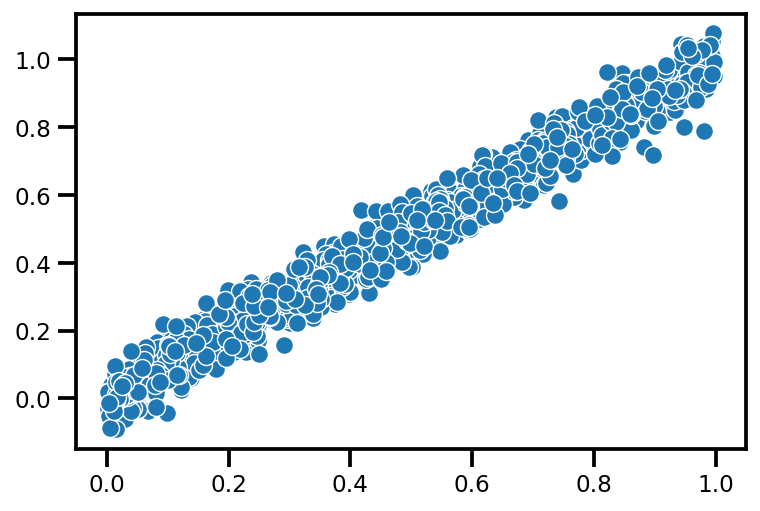

In [2]:
# random state
seed = 123
rng = onp.random.RandomState(seed)

# generate fake data
n_samples = 1000

X = rng.rand(n_samples)
Y = X + 0.05 * rng.randn(n_samples)

sns.scatterplot(x=X, y=Y);

### Dependence Measure

In [3]:
from jaxkern.kernels import rbf_kernel

results = {}

# kernels and kernel params
params_x = {'gamma': 1.0}
params_y = {'gamma': 1.0}
params_xy = {'gamma': 1.0}

# HSIC
results['hsic'] = hsic(
    X, 
    Y, 
    rbf_kernel, params_x, params_y)

print(f"HSIC: {results['hsic']:.4f}")

# Normalized HSIC (CKA)
results['cka'] = nhsic_cka(X, Y, rbf_kernel, params_x, params_y)

print(f"CKA: {results['cka']:.4f}")

# Normalized HSIC (CCA)
results['cca'] = nhsic_cca(X, Y, rbf_kernel, params_x, params_y)

print(f"CCA: {results['cca']:.4f}")

# ===========================
# Maxmimum Mean Discrepancy
# ===========================
# MMD
results['mmd_pxy'] = mmd_mi(X, Y, rbf_kernel, params_x, params_y)

print(f"MMD (pxy): {results['mmd_pxy']:.4f}")

# MMD
results['mmd_bias'] = mmd(X, Y, rbf_kernel, params_x, params_y, params_xy, bias=True)

print(f"MMD (biased): {results['mmd_bias']:.4f}")

# MMD
results['mmd'] = mmd(X, Y, rbf_kernel, params_x, params_y, params_xy, bias=False)

print(f"MMD (unbiased): {results['mmd']:.4f}")

# ==========================
# RV Coefficient
# ==========================

# RV
results['rv'] = rv_coeff(X, Y)

print(f"RV: {results['rv']:.4f}")

# Distance Correlation
results['dcorr'] = energy_distance(X, Y)

print(f"dCorr: {results['dcorr']:.4f}")

/home/emmanuel/.conda/envs/jaxkern/lib/python3.8/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


HSIC: 0.0149
CKA: 0.9744
CCA: 0.0000
MMD (pxy): 0.0149
MMD (biased): 0.0023
MMD (unbiased): 1.7276
RV: 0.9720
dCorr: 0.0000


## Kernel Parameters

In [4]:
from jaxkern.sigma import estimate_sigma_median, sigma_to_gamma
# from jaxkern.utils import 

results = {}

# kernels and kernel params
params_x = {'gamma': sigma_to_gamma(estimate_sigma_median(X, X))}
params_y = {'gamma': sigma_to_gamma(estimate_sigma_median(Y, Y))}
params_xy = {'gamma': sigma_to_gamma(estimate_sigma_median(X, Y))}

# Sigma Parameters
print(f"Sigma x: {params_x['gamma']:.4f}")
print(f"Sigma y: {params_y['gamma']:.4f}")
print(f"Sigma xy: {params_xy['gamma']:.4f}")

# HSIC
results['hsic'] = hsic(X, Y, rbf_kernel, params_x, params_y)

print(f"HSIC: {results['hsic']:.4f}")

# Normalized HSIC (CKA)
results['cka'] = nhsic_cka(X, Y, rbf_kernel, params_x, params_y)

print(f"CKA: {results['cka']:.4f}")

# Normalized HSIC (CCA)
results['cca'] = nhsic_cca(X, Y, rbf_kernel, params_x, params_y)

print(f"CCA: {results['cca']:.4f}")

# ===========================
# Maxmimum Mean Discrepancy
# ===========================
# MMD
results['mmd_pxy'] = mmd_mi(X, Y, rbf_kernel, params_x, params_y)

print(f"MMD (pxy): {results['mmd_pxy']:.4f}")

# MMD
results['mmd_bias'] = mmd(X, Y, rbf_kernel, params_x, params_y, params_xy, bias=True)

print(f"MMD (biased): {results['mmd_bias']:.4f}")

# MMD
results['mmd'] = mmd(X, Y, rbf_kernel, params_x, params_y, params_xy, bias=False)

print(f"MMD (unbiased): {results['mmd']:.4f}")

# ==========================
# RV Coefficient
# ==========================

# RV
results['rv'] = rv_coeff(X, Y)

print(f"RV: {results['rv']:.4f}")

# Distance Correlation
results['dcorr'] = energy_distance(X, Y)

print(f"dCorr: {results['dcorr']:.4f}")

Sigma x: 71.6559
Sigma y: 70.2248
Sigma xy: 71.4031
HSIC: 0.0826
CKA: 0.8248
CCA: 0.0000
MMD (pxy): 0.0825
MMD (biased): 0.0399
MMD (unbiased): 0.3896
RV: 0.9720
dCorr: 0.0000


## Non-LInear Function

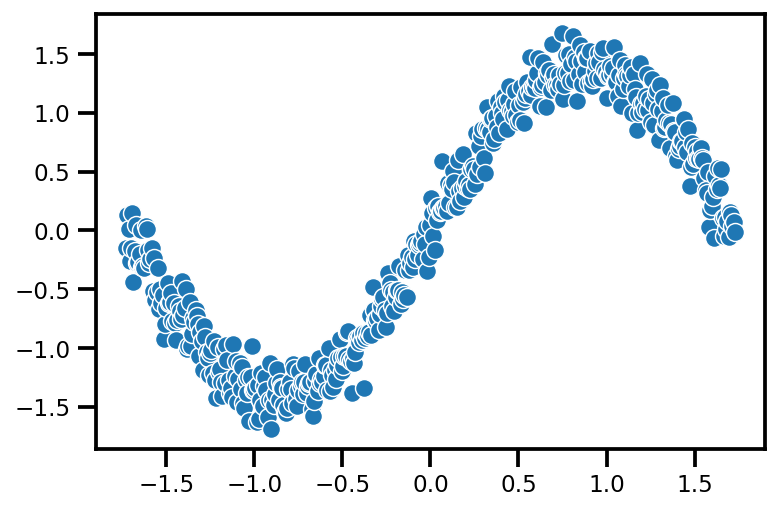

In [5]:
# random state
seed = 123
rng = onp.random.RandomState(seed)

# generate fake data
n_samples = 500

X = np.linspace(-2*np.pi, 2*np.pi, n_samples)
Y = np.sin(.5 * X) + 0.1 * rng.randn(n_samples)

X = (X - X.mean()) / X.std()
Y = (Y - Y.mean()) / Y.std()

sns.scatterplot(x=X, y=Y);

In [6]:
from jaxkern.kernels import rbf_kernel, ard_kernel
from jaxkern.sigma import estimate_sigma_median, sigma_to_gamma
# from jaxkern.utils import 

results = {}

# kernels and kernel params
params_x = {'gamma': sigma_to_gamma(estimate_sigma_median(X, X))}
params_y = {'gamma': sigma_to_gamma(estimate_sigma_median(Y, Y))}
params_xy = {'gamma': sigma_to_gamma(estimate_sigma_median(X, Y))}

# Sigma Parameters
print(f"Sigma x: {params_x['gamma']:.4f}")
print(f"Sigma y: {params_y['gamma']:.4f}")
print(f"Sigma xy: {params_xy['gamma']:.4f}")

# HSIC
results['hsic'] = hsic(X, Y, rbf_kernel, params_x, params_y)

print(f"HSIC: {results['hsic']:.4f}")

# Normalized HSIC (CKA)
results['cka'] = nhsic_cka(X, Y, rbf_kernel, params_x, params_y)

print(f"CKA: {results['cka']:.4f}")

# Normalized HSIC (CCA)
results['cca'] = nhsic_cca(X, Y, rbf_kernel, params_x, params_y)

print(f"CCA: {results['cca']:.4f}")


# ===========================
# Maxmimum Mean Discrepancy
# ===========================
# MMD
results['mmd_pxy'] = mmd_mi(X, Y, rbf_kernel, params_x, params_y)

print(f"\nMMD (pxy): {results['mmd_pxy']:.4f}")

# MMD
results['mmd_bias'] = mmd(X, Y, rbf_kernel, params_x, params_y, params_xy, bias=True)

print(f"MMD (biased): {results['mmd_bias']:.4f}")

# MMD
results['mmd'] = mmd(X, Y, rbf_kernel, params_x, params_y, params_xy, bias=False)

print(f"MMD (unbiased): {results['mmd']:.4f}")

# ==========================
# RV Coefficient
# ==========================

# RV
results['rv'] = rv_coeff(X, Y)

print(f"\nRV: {results['rv']:.4f}")

# Distance Correlation
results['dcorr'] = energy_distance(X, Y)

print(f"dCorr: {results['dcorr']:.4f}")

Sigma x: 0.4647
Sigma y: 0.4603
Sigma xy: 0.4694
HSIC: 0.0790
CKA: 0.7550
CCA: 0.0000

MMD (pxy): 0.0787
MMD (biased): 0.0826
MMD (unbiased): 1.1409

RV: 0.5958
dCorr: 0.0018


In [7]:
from jaxkern.kernels import rbf_kernel, ard_kernel
from jaxkern.sigma import estimate_sigma_median_kth, sigma_to_gamma
# from jaxkern.utils import 

results = {}

# kernels and kernel params
params_x = {'gamma': sigma_to_gamma(estimate_sigma_median_kth(X, X, 0.3)), 'var_f': 1.0}
params_y = {'gamma': sigma_to_gamma(estimate_sigma_median_kth(Y, Y, 0.3)), 'var_f': 1.0}
params_xy = {'gamma': sigma_to_gamma(estimate_sigma_median_kth(X, Y, 0.3)), 'var_f': 1.0}

# Sigma Parameters
print(f"Sigma x: {params_x['gamma']:.4f}")
print(f"Sigma y: {params_y['gamma']:.4f}")
print(f"Sigma xy: {params_xy['gamma']:.4f}")

# HSIC
results['hsic'] = hsic(X, Y, rbf_kernel, params_x, params_y)

print(f"HSIC: {results['hsic']:.4f}")

# Normalized HSIC (CKA)
results['cka'] = nhsic_cka(X, Y, rbf_kernel, params_x, params_y)

print(f"CKA: {results['cka']:.4f}")

# Normalized HSIC (CCA)
results['cca'] = nhsic_cca(X, Y, rbf_kernel, params_x, params_y)

print(f"CCA: {results['cca']:.4f}")

# ===========================
# Maxmimum Mean Discrepancy
# ===========================
# MMD
results['mmd_pxy'] = mmd_mi(X, Y, rbf_kernel, params_x, params_y)

print(f"\nMMD (pxy): {results['mmd_pxy']:.4f}")

# MMD
results['mmd_bias'] = mmd(X, Y, rbf_kernel, params_x, params_y, params_xy, bias=True)

print(f"MMD (biased): {results['mmd_bias']:.4f}")

# MMD
results['mmd'] = mmd(X, Y, rbf_kernel, params_x, params_y, params_xy, bias=False)

print(f"MMD (unbiased): {results['mmd']:.4f}")

# ==========================
# RV Coefficient
# ==========================

# RV
results['rv'] = rv_coeff(X, Y)

print(f"\nRV: {results['rv']:.4f}")
# Distance Correlation
results['dcorr'] = energy_distance(X, Y)

print(f"dCorr: {results['dcorr']:.4f}")

Sigma x: 6.8586
Sigma y: 7.0446
Sigma xy: 4.8034
HSIC: 0.0611
CKA: 0.5966
CCA: 0.0000

MMD (pxy): 0.0609
MMD (biased): 0.0000
MMD (unbiased): 0.3834

RV: 0.5958
dCorr: 0.0018
